# Module 00: Setup & Introduction to CNNs

**Welcome to the CNN Learning Journey!**

In this introductory module, you'll:
- Set up your PyTorch environment
- Verify your installation
- Learn what CNNs are and why they're important
- Load and visualize your first images
- Get an overview of the learning path ahead

## Prerequisites
- Python 3.8 or higher installed
- Basic Python knowledge (variables, functions, loops)
- Curiosity and enthusiasm!

## Time Required
30 minutes

---
## Part 1: Environment Setup and Verification

Let's make sure you have everything installed correctly!

### Step 1: Import Required Libraries

First, let's try importing PyTorch and other essential libraries.

In [1]:
# Import PyTorch and related libraries
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Print versions to verify installation
print("Library Versions:")
print("="*50)
print(f"PyTorch version: {torch.__version__}")
print(f"TorchVision version: {torchvision.__version__}")
print(f"NumPy version: {np.__version__}")
print("="*50)
print("\nAll libraries imported successfully!")

Library Versions:
PyTorch version: 2.9.1+cpu
TorchVision version: 0.24.1+cpu
NumPy version: 2.2.6

All libraries imported successfully!


### Step 2: Check GPU Availability

**Why check for GPU?**
- **GPU (Graphics Processing Unit)**: Dramatically speeds up deep learning training
- **CPU (Central Processing Unit)**: Works fine for learning, just slower

Don't worry if you don't have a GPU - you can complete the entire course on CPU!

In [2]:
# Check if CUDA (NVIDIA GPU support) is available
print("Device Information:")
print("="*50)

if torch.cuda.is_available():
    print(f"GPU is available: {torch.cuda.get_device_name(0)}")
    print(f"Number of GPUs: {torch.cuda.device_count()}")
    print(f"CUDA version: {torch.version.cuda}")
    device = torch.device('cuda')
    print(f"\nYou'll be using: GPU")
else:
    print("GPU is not available")
    device = torch.device('cpu')
    print(f"\nYou'll be using: CPU")
    print("Note: Training will be slower but perfectly fine for learning!")

print("="*50)

# Store the device for later use
print(f"\nDevice set to: {device}")

Device Information:
GPU is not available

You'll be using: CPU
Note: Training will be slower but perfectly fine for learning!

Device set to: cpu


### Step 3: Test PyTorch Operations

Let's make sure PyTorch can create and manipulate tensors (the fundamental data structure in PyTorch).

In [3]:
# Create a simple tensor
print("Testing PyTorch tensor operations...")
print("="*50)

# Create a 3x3 tensor with random values
test_tensor = torch.randn(3, 3)
print("Created a 3x3 tensor with random values:")
print(test_tensor)

# Move it to the device (GPU or CPU)
test_tensor = test_tensor.to(device)
print(f"\nMoved tensor to {device}")

# Perform a simple operation
result = test_tensor * 2
print("\nMultiplied by 2:")
print(result)

print("\n" + "="*50)
print("PyTorch is working correctly!")

Testing PyTorch tensor operations...
Created a 3x3 tensor with random values:
tensor([[ 0.6458, -0.7945, -0.4038],
        [ 0.0822, -0.2365, -0.9869],
        [ 1.3242, -1.3059, -0.2588]])

Moved tensor to cpu

Multiplied by 2:
tensor([[ 1.2917, -1.5891, -0.8077],
        [ 0.1644, -0.4731, -1.9738],
        [ 2.6483, -2.6118, -0.5175]])

PyTorch is working correctly!


---
## Part 2: What Are Convolutional Neural Networks?

### What is a CNN?

**Convolutional Neural Network (CNN)** is a type of deep learning model specifically designed for processing grid-like data, especially images.

### Think of it like this:

Imagine you're teaching a child to recognize a cat:
1. **First**, they notice simple features: edges, curves, colors
2. **Then**, they recognize cat parts: ears, whiskers, paws
3. **Finally**, they put it together: "That's a cat!"

CNNs work exactly the same way!

### Why are CNNs Special for Images?

**Traditional neural networks** treat all pixels equally and lose spatial relationships.

**CNNs** understand that:
- Nearby pixels are related (an eye is made of many connected pixels)
- The same feature can appear anywhere (a cat's ear can be on the left or right)
- We need to recognize patterns at different scales (small details and big structures)

### Real-World Applications

CNNs power amazing technologies:
- **Face Recognition**: Unlocking your phone
- **Medical Diagnosis**: Detecting diseases in X-rays and MRIs
- **Self-Driving Cars**: Recognizing pedestrians, signs, and other vehicles
- **Photo Apps**: Automatic filters, background removal
- **Agriculture**: Detecting crop diseases
- **Security**: Surveillance and anomaly detection
- **E-commerce**: Visual search ("find similar items")

---
## Part 3: Loading and Visualizing Images

Let's get hands-on! We'll load and display images using PyTorch and matplotlib.

### Understanding Image Data

**What is a digital image?**
- A grid of pixels (picture elements)
- Each pixel has color values

**Grayscale image**:
- One value per pixel (0 = black, 255 = white)
- Shape: (Height, Width)

**Color (RGB) image**:
- Three values per pixel (Red, Green, Blue)
- Shape: (Height, Width, 3) or (3, Height, Width) in PyTorch
- Each color channel: 0-255

Simple 5x5 Image (as numbers):
[[  0   0 255   0   0]
 [  0 255 255 255   0]
 [255 255 255 255 255]
 [  0 255 255 255   0]
 [  0   0 255   0   0]]

Shape: (5, 5)
Data type: uint8


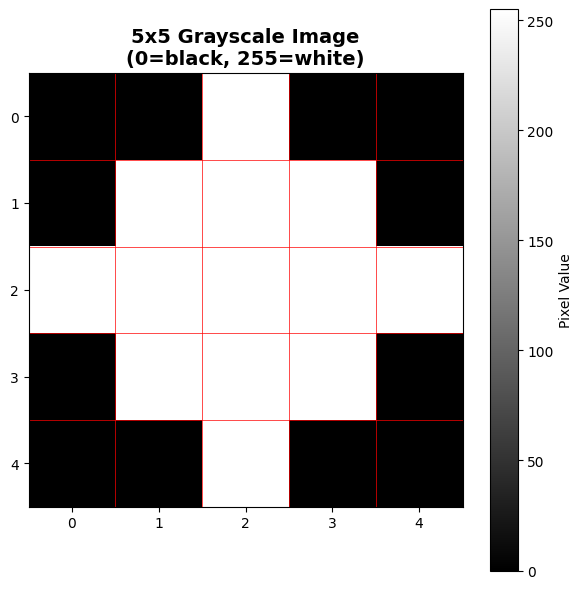


See? Each number becomes a pixel!


In [4]:
# Create a simple synthetic image to understand image structure

# Create a 5x5 grayscale image (small so we can see the numbers)
simple_image = np.array([
    [0, 0, 255, 0, 0],
    [0, 255, 255, 255, 0],
    [255, 255, 255, 255, 255],
    [0, 255, 255, 255, 0],
    [0, 0, 255, 0, 0]
], dtype=np.uint8)

print("Simple 5x5 Image (as numbers):")
print(simple_image)
print(f"\nShape: {simple_image.shape}")
print(f"Data type: {simple_image.dtype}")

# Visualize it
plt.figure(figsize=(6, 6))
plt.imshow(simple_image, cmap='gray', vmin=0, vmax=255)
plt.title('5x5 Grayscale Image\n(0=black, 255=white)', fontsize=14, fontweight='bold')
plt.colorbar(label='Pixel Value')

# Add grid to see individual pixels
for i in range(6):
    plt.axhline(i-0.5, color='red', linewidth=0.5)
    plt.axvline(i-0.5, color='red', linewidth=0.5)

plt.tight_layout()
plt.show()

print("\nSee? Each number becomes a pixel!")

### Creating a Color Image

Now let's create a small RGB (color) image to understand the 3-channel structure.

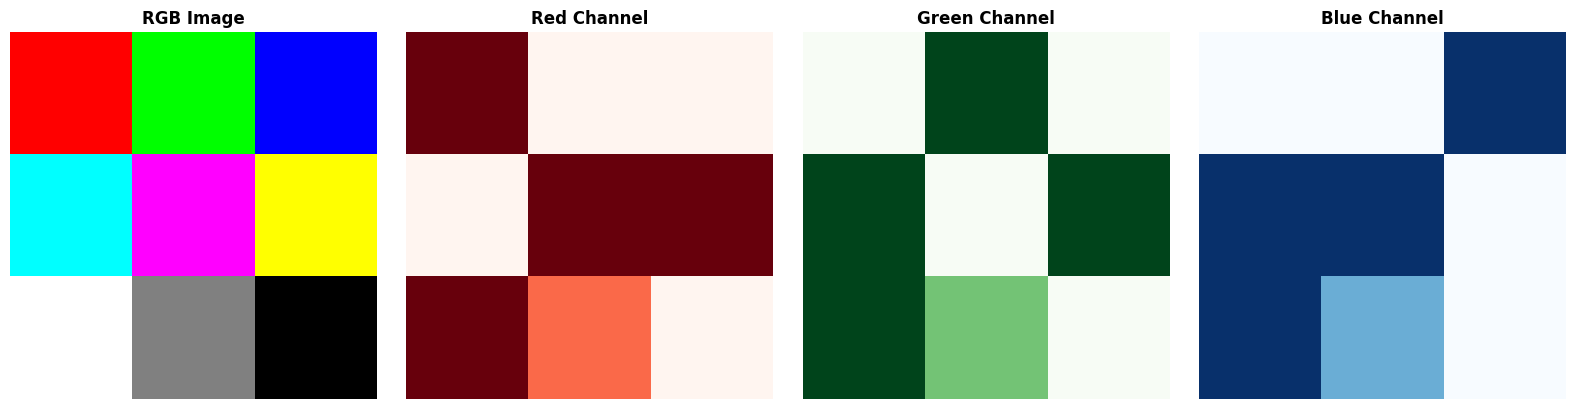

Image shape: (3, 3, 3)
Interpretation: (Height=3, Width=3, Channels=3)


In [5]:
# Create a small 3x3 RGB image
# Shape: (Height, Width, Channels) = (3, 3, 3)

rgb_image = np.zeros((3, 3, 3), dtype=np.uint8)

# Top row: Red, Green, Blue
rgb_image[0, 0] = [255, 0, 0]    # Red
rgb_image[0, 1] = [0, 255, 0]    # Green
rgb_image[0, 2] = [0, 0, 255]    # Blue

# Middle row: Cyan, Magenta, Yellow
rgb_image[1, 0] = [0, 255, 255]  # Cyan
rgb_image[1, 1] = [255, 0, 255]  # Magenta
rgb_image[1, 2] = [255, 255, 0]  # Yellow

# Bottom row: White, Gray, Black
rgb_image[2, 0] = [255, 255, 255] # White
rgb_image[2, 1] = [128, 128, 128] # Gray
rgb_image[2, 2] = [0, 0, 0]       # Black

# Visualize
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Full color image
axes[0].imshow(rgb_image, interpolation='nearest')
axes[0].set_title('RGB Image', fontsize=12, fontweight='bold')
axes[0].axis('off')

# Red channel
axes[1].imshow(rgb_image[:,:,0], cmap='Reds', vmin=0, vmax=255, interpolation='nearest')
axes[1].set_title('Red Channel', fontsize=12, fontweight='bold')
axes[1].axis('off')

# Green channel
axes[2].imshow(rgb_image[:,:,1], cmap='Greens', vmin=0, vmax=255, interpolation='nearest')
axes[2].set_title('Green Channel', fontsize=12, fontweight='bold')
axes[2].axis('off')

# Blue channel
axes[3].imshow(rgb_image[:,:,2], cmap='Blues', vmin=0, vmax=255, interpolation='nearest')
axes[3].set_title('Blue Channel', fontsize=12, fontweight='bold')
axes[3].axis('off')

plt.tight_layout()
plt.show()

print(f"Image shape: {rgb_image.shape}")
print(f"Interpretation: (Height={rgb_image.shape[0]}, Width={rgb_image.shape[1]}, Channels={rgb_image.shape[2]})")

### Converting Images to PyTorch Tensors

PyTorch works with **tensors**, not NumPy arrays. Let's learn to convert between them.

**Important**: PyTorch uses channel-first format `(C, H, W)` while most image libraries use `(H, W, C)`!

In [6]:
# Convert NumPy image to PyTorch tensor

print("Original NumPy array shape (H, W, C):", rgb_image.shape)

# Method 1: Using torch.from_numpy and permute
tensor_image = torch.from_numpy(rgb_image)
print("After torch.from_numpy:", tensor_image.shape)

# Permute to (C, H, W) format
tensor_image = tensor_image.permute(2, 0, 1)
print("After permute to (C, H, W):", tensor_image.shape)

# Normalize to [0, 1] range (neural networks prefer this)
tensor_image_normalized = tensor_image.float() / 255.0
print("After normalization:", tensor_image_normalized.shape)
print("Value range: [{:.2f}, {:.2f}]".format(
    tensor_image_normalized.min().item(),
    tensor_image_normalized.max().item()
))

print("\nNote: CNNs typically expect:")
print("  - Format: (Batch, Channels, Height, Width)")
print("  - Values: [0, 1] or normalized with mean/std")

Original NumPy array shape (H, W, C): (3, 3, 3)
After torch.from_numpy: torch.Size([3, 3, 3])
After permute to (C, H, W): torch.Size([3, 3, 3])
After normalization: torch.Size([3, 3, 3])
Value range: [0.00, 1.00]

Note: CNNs typically expect:
  - Format: (Batch, Channels, Height, Width)
  - Values: [0, 1] or normalized with mean/std


---
## Part 4: Download Datasets

We'll use real datasets throughout this course. Let's download them now!

In [7]:
# We'll download MNIST as our first dataset
# MNIST: 70,000 handwritten digits (0-9)

from torchvision import datasets, transforms
import os

# Define data directory
data_dir = '../data/datasets'
os.makedirs(data_dir, exist_ok=True)

print("Downloading MNIST dataset...")
print("This might take a few minutes on first run.")
print("="*50)

# Download MNIST training set
mnist_train = datasets.MNIST(
    root=data_dir,
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

print(f"\nMNIST training set downloaded!")
print(f"Number of training images: {len(mnist_train)}")
print(f"Image shape: {mnist_train[0][0].shape}")
print(f"Number of classes: {len(mnist_train.classes)}")
print(f"Classes: {mnist_train.classes}")
print("="*50)

This might take a few minutes on first run.

MNIST training set downloaded!
Number of training images: 60000
Image shape: torch.Size([1, 28, 28])
Number of classes: 10
Classes: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


### Visualize MNIST Samples

Let's see what the MNIST digits look like!

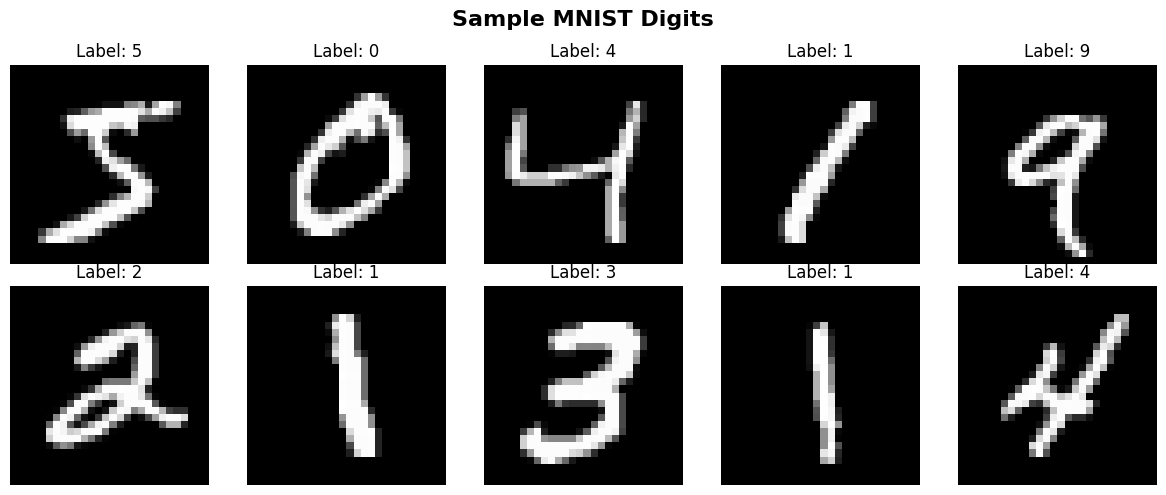

These are the images we'll teach our CNN to recognize!


In [8]:
# Display a grid of MNIST images

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Sample MNIST Digits', fontsize=16, fontweight='bold')

for idx, ax in enumerate(axes.flat):
    # Get image and label
    image, label = mnist_train[idx]
    
    # Convert tensor to numpy for visualization
    # image shape: (1, 28, 28) -> squeeze to (28, 28)
    img_np = image.squeeze().numpy()
    
    # Display
    ax.imshow(img_np, cmap='gray')
    ax.set_title(f'Label: {label}', fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()

print("These are the images we'll teach our CNN to recognize!")

---
## Part 5: Your Learning Journey

### What's Next?

Here's the complete learning path you'll follow:

#### **Module 01: Neural Network Fundamentals** (45 min)
Learn the basics of neural networks before diving into CNNs.

#### **Module 02: Introduction to CNNs** (45 min)
Understand convolution, filters, and why CNNs work for images.

#### **Module 03: Building Your First CNN** (60 min)
Hands-on: Build a CNN to recognize MNIST digits!

#### **Module 04: Training & Optimization** (45 min)
Learn how to train CNNs effectively.

#### **Module 05: CNN Architectures** (45 min)
Explore famous architectures like LeNet, AlexNet, VGG, ResNet.

#### **Module 06: Transfer Learning** (60 min)
Use pre-trained models to solve your own problems!

#### **Module 07: Image Classification Project** (60 min)
Build a complete image classifier from scratch.

#### **Module 08: Introduction to Object Detection** (45 min)
Detect and localize multiple objects in images.

#### **Module 09: Introduction to Image Segmentation** (45 min)
Classify every pixel in an image.

#### **Module 10: Final Projects & Next Steps** (30 min)
Ideas for building your portfolio and continuing your learning.

### Tips for Success

1. **Run every code cell** - Don't just read, execute!
2. **Experiment** - Change parameters and see what happens
3. **Take breaks** - Deep learning is complex, let concepts sink in
4. **Ask questions** - Use forums, communities, or GitHub Issues
5. **Build projects** - Apply what you learn to your own problems

### Getting Help

- **PyTorch Documentation**: [pytorch.org/docs](https://pytorch.org/docs)
- **PyTorch Forums**: [discuss.pytorch.org](https://discuss.pytorch.org)
- **This Project's Issues**: For questions specific to this course

---
## Summary

Congratulations on completing Module 00!

### What You Learned:
- Set up and verified your PyTorch environment
- Checked for GPU availability
- Understood what CNNs are and why they're important
- Learned how images are represented digitally
- Converted images to PyTorch tensors
- Downloaded the MNIST dataset
- Visualized sample images

### Key Takeaways:
- CNNs are specialized for image processing
- Images are grids of pixels with numeric values
- PyTorch uses tensors in (C, H, W) format
- We normalize images to [0, 1] for neural networks

### Next Steps:
Proceed to **Module 01: Neural Network Fundamentals** to learn how neural networks learn!

---

**Ready to continue? Let's build your first neural network!**

---
## Practice Exercises (Optional)

Try these to reinforce your learning:

1. **Create your own image**: Make a 10x10 NumPy array with a simple pattern (like a cross or a letter)
2. **Convert to tensor**: Convert your image to a PyTorch tensor and normalize it
3. **Visualize MNIST**: Display 20 random MNIST images with their labels
4. **Explore colors**: Create a small RGB image and visualize each channel separately
5. **Batch of images**: Stack multiple MNIST images into a batch tensor with shape (Batch, Channels, Height, Width)

In [9]:
# Exercise space - Try the exercises here!

# Example: Create your own 10x10 pattern
# your_image = np.zeros((10, 10), dtype=np.uint8)
# ... fill in your pattern ...
# plt.imshow(your_image, cmap='gray')
# plt.show()